In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers

In [2]:
from tensorflow.keras.datasets import cifar10

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

In [6]:
import matplotlib.pyplot as plt

In [7]:
import numpy as np
import os

In [8]:
import cv2

In [10]:
# Read Image

img = cv2.imread("Test_Image1.jpg")
img.shape

(1200, 1600, 3)

In [12]:
img = tf.io.read_file("Test_Image1.jpg")

img = tf.image.decode_image(img, channels=3)
img.shape

TensorShape([1200, 1600, 3])

In [19]:
img[0]

<tf.Tensor: shape=(1600, 3), dtype=uint8, numpy=
array([[ 82, 103, 134],
       [ 54,  75, 106],
       [ 56,  77, 108],
       ...,
       [ 43,  62,  95],
       [ 43,  62,  95],
       [ 43,  62,  95]], dtype=uint8)>

# Load and Preprocess Data

In [14]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [15]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [16]:
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [21]:
datagen = ImageDataGenerator(
        rotation_range=15,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=True
)
datagen.fit(x_train)

# Build CNN Model

In [22]:
def build_model():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu',
                kernel_regularizer=regularizers.l2(0.001), input_shape=(32, 32, 3)))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(32, (3,3), activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size=(2,2)))
    model.add(layers.Dropout(0.25))

    model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(64, (3,3), activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size=(2,2)))
    model.add(layers.Dropout(0.25))

    model.add(layers.Flatten())
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.5))

    model.add(layers.Dense(10, activation='softmax'))

    return model

model = build_model()

/Users/ranjith/ENTER/envs/mlp/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=3,
    verbose=1
)

In [24]:
log_dir="logs/demo2"

tensorboard_callback = TensorBoard(log_dir=log_dir)

checkpoint = ModelCheckpoint("best_model.keras", monitor="val_accuracy", save_best_only=True, verbose=1)

In [26]:
history = model.fit(datagen.flow(x_train, y_train, batch_size=64),
                    epochs=10,
                    validation_data=(x_test, y_test),
                    callbacks=[tensorboard_callback, checkpoint, lr_scheduler, early_stop])

Epoch 1/10


/Users/ranjith/ENTER/envs/mlp/lib/python3.9/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.3507 - loss: 2.1107
Epoch 1: val_accuracy improved from -inf to 0.54880, saving model to best_model.keras
782/782 ━━━━━━━━━━━━━━━━━━━━ 37s 47ms/step - accuracy: 0.3508 - loss: 2.1102 - val_accuracy: 0.5488 - val_loss: 1.2992 - learning_rate: 0.0010
Epoch 2/10
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.5426 - loss: 1.2966
Epoch 2: val_accuracy improved from 0.54880 to 0.59220, saving model to best_model.keras
782/782 ━━━━━━━━━━━━━━━━━━━━ 38s 49ms/step - accuracy: 0.5426 - loss: 1.2965 - val_accuracy: 0.5922 - val_loss: 1.1808 - learning_rate: 0.0010
Epoch 3/10
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.6004 - loss: 1.1278
Epoch 3: val_accuracy improved from 0.59220 to 0.64580, saving model to best_model.keras
782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 51ms/step - accuracy: 0.6005 - loss: 1.1277 - val_accuracy: 0.6458 - val_loss: 1.0475 - learning_rate: 0.0010
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - ac

# Predict the Model

In [28]:
img = x_test[0]
img.shape

img1 = np.expand_dims(img, axis=0)
img1.shape

(1, 32, 32, 3)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Random Test Image Index: 1797
Actual Label:   automobile (1)
Predicted Label:   automobile (1)


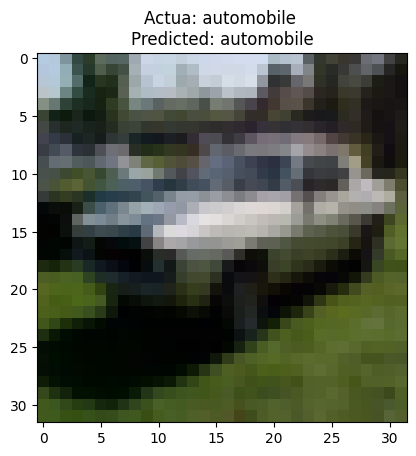

In [32]:
# CIFAR-10 Class Names

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

idx = np.random.randint(0, len(x_test))

img = x_test[idx]
true_label = np.argmax(y_test[idx])

# Model expects [1, 32, 32, 3]

img_input = np.expand_dims(img, axis=0)

pred = model.predict(img_input)

pred_label = np.argmax(pred)

print('Random Test Image Index:', idx)
print('Actual Label:  ', class_names[true_label], f"({true_label})")
print('Predicted Label:  ', class_names[pred_label], f"({pred_label})")


plt.imshow(img)
plt.title(f"Actua: {class_names[true_label]} \nPredicted: {class_names[pred_label]}")
plt.show()

# Save the Model

In [34]:
model.save('demo_model_cifar.keras')

# Load the Model from Production

In [35]:
from keras.models import load_model

loaded_model = load_model('demo_model_cifar.keras')



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Random Test Image Index: 2193
Actual Label:   bird (2)
Predicted Label:   airplane (0)


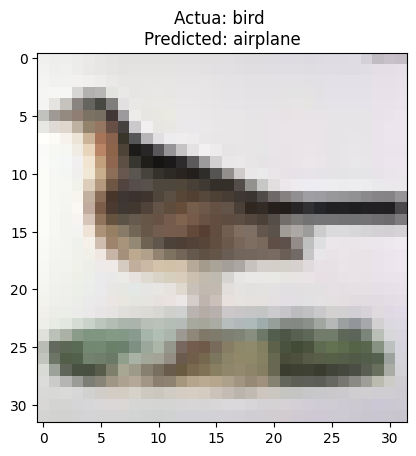

In [37]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

idx = np.random.randint(0, len(x_test))

img = x_test[idx]
true_label = np.argmax(y_test[idx])

# Model expects [1, 32, 32, 3]

img_input = np.expand_dims(img, axis=0)

pred = loaded_model.predict(img_input)

pred_label = np.argmax(pred)

print('Random Test Image Index:', idx)
print('Actual Label:  ', class_names[true_label], f"({true_label})")
print('Predicted Label:  ', class_names[pred_label], f"({pred_label})")


plt.imshow(img)
plt.title(f"Actua: {class_names[true_label]} \nPredicted: {class_names[pred_label]}")
plt.show()